In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param





/mnt/c/Users/jam60/OneDrive/Repos/vivaldi/back_testing


In [2]:
def load_config():
    my_config = {}
    with open('config.config') as config:
        for line in config:
            args = line.split('=')
            my_config[args[0]] = args[1].rstrip().split(',')
    return my_config

model = Trading(load_config())
dataset = model.dfs[0][0]

In [3]:

optimal = Optimal_v2(_params=[], _name='optimal')
optimal.genData(dataset, gen_new_values=False)

In [14]:
def map_to_price_entry(row):
    if row.optimal > 0.0:
        return row.close
    else:
        return None

def map_to_price_exit(row):
    if row.optimal < -0.0:
        return row.close
    else:
        return None

In [15]:
dataset['optimal_entry'] = dataset.apply(lambda x: map_to_price_entry(x), axis=1)
dataset['optimal_exit'] = dataset.apply(lambda x: map_to_price_exit(x), axis=1)

In [16]:
dataset['close'].isnull().values.any()

False

In [12]:
dataset

,time,open,high,low,close,volume,trades,optimal,optimal_entry,optimal_exit
3410066,1585699260,6426.5,6432.8,6425.9,6432.8,1.500000,3,0.000000,NaN,NaN
3410067,1585699320,6430.6,6432.4,6426.1,6426.1,4.695397,16,1.000000,6426.1,NaN
3410068,1585699380,6432.5,6432.5,6432.5,6432.5,0.010178,3,-0.017857,NaN,NaN
3410069,1585699440,6431.2,6431.2,6428.9,6428.9,0.195211,3,0.982143,6428.9,NaN
3410070,1585699500,6431.6,6431.6,6431.6,6431.6,0.129405,1,0.000000,NaN,NaN
3410071,1585699560,6433.1,6433.7,6433.1,6433.7,0.250000,2,-0.053571,NaN,NaN
3410072,1585699620,6431.4,6431.4,6425.1,6425.1,0.032751,2,0.000000,NaN,NaN
3410073,1585699680,6426.0,6426.0,6425.0,6425.1,0.136578,4,0.000000,NaN,NaN
3410074,1585699740,6426.3,6432.0,6426.3,6430.5,0.191329,6,-0.035714,NaN,NaN
3410075,1585699800,6430.5,6430.5,6430.5,6430.5,0.091276,1,0.000000,NaN,NaN


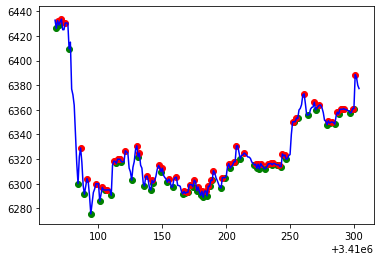

In [17]:
import matplotlib.pyplot as plt
plt.clf()
plt.scatter(x=dataset.index, y=dataset['optimal_entry'], color='green')
plt.scatter(x=dataset.index, y=dataset['optimal_exit'], color='red')
plt.plot(dataset.index, dataset['close'], color='blue')
plt.show()